In [2]:
import seaborn as sns
import pandas as pd
from ads_surkas.preprocessing import load_data, clean_data

In [3]:
# load data
# data = pd.read_csv("./.data/pakistan_ecommerce.csv", low_memory=False)
# data.loc[1048570]
data = clean_data(load_data("./.data/pakistan_ecommerce.csv"))
# data["Year"] = data["Year"].astype("int32")

# data["Month"] = data["Month"].astype("int32")
# print(data.dtypes)
#data["Time"] = pd.to_datetime(data["Year"]+data["Month"]+"1",format='%Y-%m-%d')
# data[(data["Year"] != 2016.0) & (data["Year"] != 2017.0) & (data["Year"] != 2018.0)]["Year"]
data.dtypes


/home/ulrik2204/code/school/ads_surkas/ads_surkas/preprocessing/preprocess.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Year"] = data["Year"].astype("int32")
/home/ulrik2204/code/school/ads_surkas/ads_surkas/preprocessing/preprocess.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"] = data["Month"].astype("int32")
/home/ulrik2204/code/school/ads_surkas/ads_surkas/preprocessing/preprocess.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

item_id                         float64
status                           object
created_at                       object
sku                              object
price                           float64
qty_ordered                     float64
grand_total                     float64
increment_id                     object
category_name_1                  object
sales_commission_code            object
discount_amount                 float64
payment_method                   object
Working Date                     object
BI Status                        object
 MV                              object
Year                              int32
Month                             int32
Customer Since                   object
M-Y                              object
FY                               object
Customer ID                     float64
Unnamed: 21                     float64
Unnamed: 22                     float64
Unnamed: 23                     float64
Unnamed: 24                     float64


<AxesSubplot: >

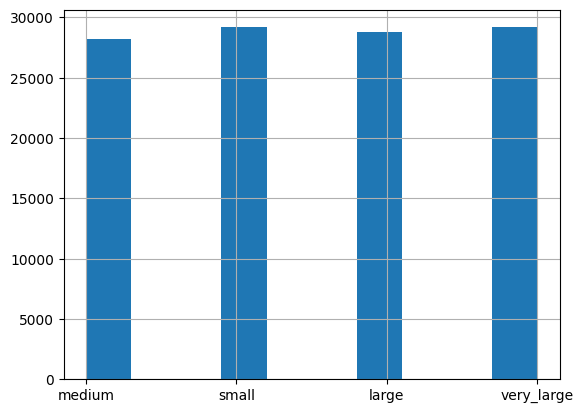

In [68]:
from typing import List, Dict, Any, Tuple
import numpy as np
import math
from enum import Enum

class Optimality(Enum):
    OPTIMAL = "optimal"
    LOWER = "lower"
    HIGHER = "higher"

def label_customer(row):
    # return "small" if 0 < row["all_time_total"] < 33785 else "big"
    return "small" if 0 < row["all_time_total"] <= 1149 else "medium" if 1149 < row["all_time_total"] <= 3500 else "large" if 3500 < row["all_time_total"] < 16816.0 else "very_large" # if 58030 < row["all_time_total"] < 158049 else "gigant" #("small", "medium", "large"), "very_large") # "small" if da["all_time_total"] > 5055 else "medium" if da["all_time_total"] > 17782 else "large" if dat["all_time_total"] > 58030 else "very_large"


dat = data.groupby("increment_id").first().groupby("Customer ID", as_index=False).agg(all_time_total=("grand_total","sum"), order_count=("grand_total", "count"))
# da = da.apply(label_customer)
# da["group"] = np.select((0 < da["all_time_total"] <= 5055), (5055 < da["all_time_total"] <= 17782), (17782 < da["all_time_total"] < 58030 ), (58030 < da["all_time_total"] < 158049), ("small", "medium", "large"), "very_large") # "small" if da["all_time_total"] > 5055 else "medium" if da["all_time_total"] > 17782 else "large" if dat["all_time_total"] > 58030 else "very_large"
# label_customer(da)
ROWS = 115326
q = 0
TIlE = 28831 
#dat.sort_values("all_time_total").iloc[math.floor(ROWS/4)*2:math.floor(ROWS/4)*3]
dat["group"] = dat.apply(label_customer, axis=1)
# da = dat.groupby("grand_total")["order_count"].agg(all_time_total_count="count").reset_index()
dat["group"].hist()

# da = da[da["all_time_total"] < 10000]
# d["small"] = da[dat["all_time_total"] > 5055]
# d["medium"] = da[dat["all_time_total"] > 17782]
# d["large"] = da[dat["all_time_total"] > 58030]
# d["very_large"] = da[dat["all_time_total"] > 158049]
# da.hist()

#da.hist(bins=5)
#da.sort_values("all_time_total_count", ascending=False)
# print("mean", dat["all_time_total"].mean())
# dat
# print("hello", dat[""].quantile(0.25, axis=1))  # 1149
# print("hello", dat.quantile(0.5, axis=1))  # 57663
# print("hello", dat.quantile(0.75, axis=1))  # 86494



In [ ]:
total1 = 0
total2 = 0
total3 = 0
checked = []
for i, row in data.iterrows():
    if row["Customer ID"] == 5032 and row["increment_id"] not in checked:
        total2 += row["grand_total"]
        checked.append(row["increment_id"])
    if row["Customer ID"] == 5032: 
        total1 += row["price"] * row["qty_ordered"]
        total3 += row["price"] * row["qty_ordered"] - row["discount_amount"]
        checked.append(row["increment_id"])

In [ ]:
print("price * qty", total1)
print("sum of grand total", total2)
print("price * qty - discount", total3)

price * qty 36202688.0
sum of grand total 36159289.45
price * qty - discount 36182088.45000001


In [ ]:
# dat = data.groupby("increment_id").first().groupby("Customer ID", as_index=False).agg(all_time_total=("grand_total","sum"), order_count=("grand_total", "count"))
dat = data.copy() #.groupby("Customer ID", as_index=False).agg(all_time_total=("grand_total","sum"), order_count=("grand_total", "count"))
dat["all_time_price"] = dat["price"] * dat["qty_ordered"] - dat["discount_amount"]
dat = dat.filter(["Customer ID", "increment_id", "price", "qty_ordered", "discount_amount", "grand_total", "all_time_price"])
cust = dat.groupby("Customer ID", as_index=False).agg(total_price=("all_time_price", "sum"))
all = cust.merge(dat, on="Customer ID")
dat[dat["Customer ID"] == 5032]

# dat[dat["Customer ID"] == 5032].tail(20)

,Customer ID,increment_id,price,qty_ordered,discount_amount,grand_total,all_time_price
18879,5032.0,100163405,750.0,1.0,0.0,750.0,750.0
20539,5032.0,100164797,499.0,1.0,0.0,499.0,499.0
21971,5032.0,100166021,549.0,1.0,0.0,1048.0,549.0
21972,5032.0,100166021,499.0,1.0,0.0,1048.0,499.0
26758,5032.0,100170045,499.0,1.0,0.0,499.0,499.0
...,...,...,...,...,...,...,...
368771,5032.0,100404106,299.0,1.0,59.8,1157.6,239.2
368772,5032.0,100404106,699.0,1.0,139.8,1157.6,559.2
380840,5032.0,100412183,9799.0,1.0,1000.0,8799.0,8799.0
380885,5032.0,100412207,9799.0,1.0,1000.0,8799.0,8799.0


In [ ]:
# g = sns.PairGrid(data, vars=['category_name_1', 'grand_total', 'Time'])
# g.map_upper(sns.histplot)